<a href="https://colab.research.google.com/github/ecarlos09/data-manipulation-exercises/blob/main/Semhar_Elwin_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import csv
import pandas as pd

In [ ]:
# Fetch book data
response = requests.get('https://anapioficeandfire.com/api/books/')
book_data = response.json()

In [ ]:
# Extract desired book information

def select_book_data(book):
  return {
      "title": book["name"],
      "num_pages": book["numberOfPages"],
      "character_count": len(book["characters"]),
      "released": book["released"]
  }

books = [select_book_data(b) for b in book_data]
print(f'{len(books)} books have been created!')
books[0]

10 books have been created!


{'character_count': 434,
 'num_pages': 694,
 'released': '1996-08-01T00:00:00',
 'title': 'A Game of Thrones'}

In [ ]:
# Create a CSV file for books

headers = ['title', 'num_pages', 'character_count', 'released']

with open("data/gotbooks.csv", "w", newline='') as file:
    f = csv.writer(file)
    f.writerow(headers)
    for b in books:
        values = [b[h] for h in headers]
        f.writerow(values)

In [ ]:
# Create dataframe for books

books_df = pd.read_csv('data/gotbooks.csv')
books_df.head()

,title,num_pages,character_count,released
0,A Game of Thrones,694,434,1996-08-01T00:00:00
1,A Clash of Kings,768,778,1999-02-02T00:00:00
2,A Storm of Swords,992,1021,2000-10-31T00:00:00
3,The Hedge Knight,164,54,2005-03-09T00:00:00
4,A Feast for Crows,784,1241,2005-11-08T00:00:00


In [ ]:
# Clean released column

print(type(books_df['released'][0]))
books_df['released'] = pd.to_datetime(books_df['released'])
print(books_df)

<class 'str'>
                        title  num_pages  character_count   released
0           A Game of Thrones        694              434 1996-08-01
1            A Clash of Kings        768              778 1999-02-02
2           A Storm of Swords        992             1021 2000-10-31
3            The Hedge Knight        164               54 2005-03-09
4           A Feast for Crows        784             1241 2005-11-08
5             The Sworn Sword        152               84 2008-06-18
6          The Mystery Knight        416               71 2011-03-29
7        A Dance with Dragons       1040              861 2011-07-12
8  The Princess and the Queen        784               57 2013-12-03
9            The Rogue Prince        832               55 2014-06-17


Now we have our data, let's make some predictions!

Usually the number of pages in a book increases with every release.  One could also reasonably expect the number of characters in a book to correlate with the number of pages.  The same could apply for character count versus book release, as one might expect more characters to be introduced as the series goes on.  However, since this is George R R Martin we're talking about, the number of characters is likely to peak somewhere in the middle of the book series, before he starts killing them all off ...

So our formal predictions are:

*   The more recent the release date, the larger the number of pages in the book
*   The larger the number of pages in the book, the greater the character count
*   Character count will increase with each new book release, before reaching a peak in the middle of the series and then steadily decreasing





Let's create some scatter graphs to test our predictions!

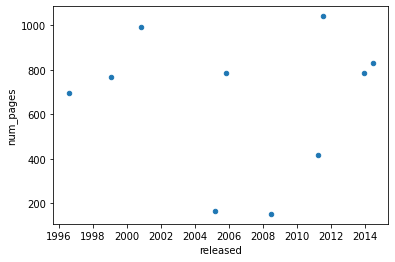

In [ ]:
# Release date vs page count

books_df.plot('released', 'num_pages', kind='scatter')

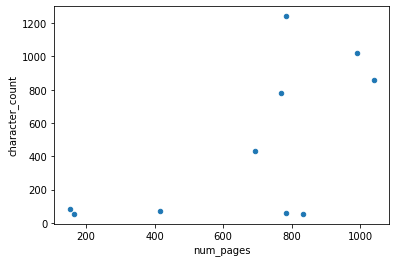

In [ ]:
# Page count vs character count

books_df.plot('num_pages', 'character_count', kind='scatter')

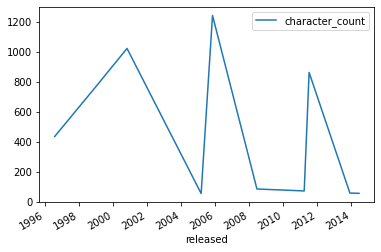

In [ ]:
# Release date vs character count

books_df.plot('released', 'character_count', kind='line')

**Conclusions:**

None of our predictions really worked out!  There does not seem to be any correlation between any of the variables that we tested.  Oh well!